In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, RobustScaler
dataset='banknote'
df=pd.read_csv('Dataset/banknote.csv').sample(frac=1.0).reset_index(drop=True)
N=len(df)

df=df.fillna(0)
feats=df.columns.values[:-1]
target=df.columns.values[-1]
scaler=MinMaxScaler()
scaler.fit(df[feats])
df[feats]=scaler.transform(df[feats])
ind=(df.Result==0)
#df.loc[ind,'Result']=-1
df.head()

,Attr_A,Attr_B,Attr_C,Attr_D,Result
0,0.721084,0.343476,0.482172,0.829279,0
1,0.332129,0.650174,0.166692,0.514053,1
2,0.376479,0.618349,0.196588,0.563318,1
3,0.723139,0.787302,0.210098,0.573311,0
4,0.358133,0.920325,0.341612,0.337452,0


In [2]:
n_train=int(N*0.60)
_train_df=df.loc[:n_train]
_val_df=df.loc[n_train:]

_train_x=np.array(_train_df[feats],dtype=np.float64)
_train_y=np.array(_train_df[target],dtype=np.float64).reshape(-1,1)
_val_x=np.array(_val_df[feats],dtype=np.float64)
_val_y=np.array(_val_df[target],dtype=np.float64).reshape(-1,1)

In [3]:
class LogisticRegression    ():
    def __init__(self,n_feats,C=1.0):
        np.random.seed(1)
        self.weights=np.random.random(n_feats+1)-0.5
        self.weights[0]=0.0
        print(self.weights)
        self.C=C
        
    def predict(self,X,Y):
        _X=np.concatenate([np.ones((X.shape[0],1)),X],axis=1)
        self.Y=np.matmul(self.weights,_X.T)
        self.a= 1/(1+np.exp(-self.Y))
        #self.loss=np.mean(np.square(self.weights)) + self.C*np.mean((np.maximum(0.0,self.Y*Y)))
        self.Y[self.a>=0.5]=1.0
        self.Y[self.a<0.5]=0.0
        return self.Y
    
    def calc_grads(self,X,Y):
        _X=np. concatenate([np.ones((X.shape[0],1)),X],axis=1)
        self.grads=np.zeros_like(self.weights)
        
        for x,y,a in zip(_X,Y,self.a):
            if a==0.0: dl_da= (1-y)/(1-a)
            elif a==1.0: dl_da= - (y/a)
            else: dl_da= - (y/a) + (1-y)/(1-a)
            da_dz= a*(1-a)
            dz_dw= x
            dl_dw= dl_da * da_dz * dz_dw
            self.grads+= (1/X.shape[0])*(dl_dw)
        
        #_grads_a=mask*(self.weights - self.C*np.matmul(Y,X.T))
        #_grads_b=(1-mask)*(self.weights)
        #self.grads=_grads_a + _grads_b
        return self.grads
    
    def update_weights(self,lr):
        #print(self.grads)
        self.weights= self.weights - lr*self.grads
        

In [4]:
_debug=False
if _debug==True:
    bind=0
    _svmc=LogisticRegression(_train_x.shape[1],100)
    batch_size=100
    no_train_batch=len(_train_y)//batch_size
    no_val_batch=len(_val_y)//batch_size

    x_batch=_train_x[b_ind*batch_size:(b_ind+1)*batch_size]

    y_batch=_train_y[b_ind*batch_size:(b_ind+1)*batch_size]
    y_pred=_svmc.predict(x_batch,y_batch)
    _svmc.calc_grads(x_batch,y_batch)
    _svmc.update_weights(0.0001)

In [5]:
_svmc=LogisticRegression(_train_x.shape[1],100)
batch_size=100
no_train_batch=len(_train_y)//batch_size
no_val_batch=len(_val_y)//batch_size

train_loss=[]
val_loss=[]
for _epoch in range(1000):
    _tloss=0
    _vloss=0
    
    for  b_ind in range(no_train_batch): 
        x_batch=_train_x[b_ind*batch_size:(b_ind+1)*batch_size]
        y_batch=_train_y[b_ind*batch_size:(b_ind+1)*batch_size]
        y_pred=_svmc.predict(x_batch,y_batch)
        _svmc.calc_grads(x_batch,y_batch)
        _svmc.update_weights(0.1)
        _tloss+=np.mean(np.square(y_batch.reshape(-1)-y_pred))
        #print(y_pred)

    y_pred=_svmc.predict(_val_x,_val_y)
    _vloss+=np.mean(np.square(_val_y.reshape(-1)-y_pred))
    #print(_svmc.weights)
    print('Epoch',_epoch,'Train Loss',_tloss,'Validation Loss',_vloss)
    train_loss.append(_tloss)
    val_loss.append(_vloss)

[ 0.          0.22032449 -0.49988563 -0.19766743 -0.35324411]
Epoch 0 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 1 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 2 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 3 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 4 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 5 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 6 Train Loss 3.46 Validation Loss 0.46265938069216755
Epoch 7 Train Loss 3.45 Validation Loss 0.43897996357012753
Epoch 8 Train Loss 3.4 Validation Loss 0.43169398907103823
Epoch 9 Train Loss 3.3700000000000006 Validation Loss 0.4262295081967213
Epoch 10 Train Loss 3.3600000000000003 Validation Loss 0.424408014571949
Epoch 11 Train Loss 3.3100000000000005 Validation Loss 0.4207650273224044
Epoch 12 Train Loss 3.27 Validation Loss 0.4134790528233151
Epoch 13 Train Loss 3.2 Validation Loss 0.40437158469945356
Epoch 14 Train Loss 3.06 Validation Loss 0.3916211293260473

Epoch 127 Train Loss 1.07 Validation Loss 0.16029143897996356
Epoch 128 Train Loss 1.06 Validation Loss 0.16029143897996356
Epoch 129 Train Loss 1.06 Validation Loss 0.16029143897996356
Epoch 130 Train Loss 1.06 Validation Loss 0.16029143897996356
Epoch 131 Train Loss 1.06 Validation Loss 0.15846994535519127
Epoch 132 Train Loss 1.06 Validation Loss 0.15846994535519127
Epoch 133 Train Loss 1.06 Validation Loss 0.15846994535519127
Epoch 134 Train Loss 1.04 Validation Loss 0.15846994535519127
Epoch 135 Train Loss 1.04 Validation Loss 0.15846994535519127
Epoch 136 Train Loss 1.04 Validation Loss 0.15664845173041894
Epoch 137 Train Loss 1.04 Validation Loss 0.15664845173041894
Epoch 138 Train Loss 1.04 Validation Loss 0.15664845173041894
Epoch 139 Train Loss 1.03 Validation Loss 0.15664845173041894
Epoch 140 Train Loss 1.03 Validation Loss 0.15664845173041894
Epoch 141 Train Loss 1.02 Validation Loss 0.15664845173041894
Epoch 142 Train Loss 1.0 Validation Loss 0.15664845173041894
Epoch 143

Epoch 258 Train Loss 0.78 Validation Loss 0.12932604735883424
Epoch 259 Train Loss 0.78 Validation Loss 0.12932604735883424
Epoch 260 Train Loss 0.78 Validation Loss 0.12932604735883424
Epoch 261 Train Loss 0.78 Validation Loss 0.12932604735883424
Epoch 262 Train Loss 0.78 Validation Loss 0.12932604735883424
Epoch 263 Train Loss 0.77 Validation Loss 0.12932604735883424
Epoch 264 Train Loss 0.77 Validation Loss 0.12932604735883424
Epoch 265 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 266 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 267 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 268 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 269 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 270 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 271 Train Loss 0.77 Validation Loss 0.12750455373406194
Epoch 272 Train Loss 0.77 Validation Loss 0.12568306010928962
Epoch 273 Train Loss 0.77 Validation Loss 0.12568306010928962
Epoch 27

Epoch 383 Train Loss 0.62 Validation Loss 0.10564663023679417
Epoch 384 Train Loss 0.61 Validation Loss 0.10564663023679417
Epoch 385 Train Loss 0.61 Validation Loss 0.10564663023679417
Epoch 386 Train Loss 0.61 Validation Loss 0.10564663023679417
Epoch 387 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 388 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 389 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 390 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 391 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 392 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 393 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 394 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 395 Train Loss 0.6000000000000001 Validation Loss 0.10564663023679417
Epoch 396 Train Loss 0.5900000000000001 Validation Loss 0.1038251366

Epoch 503 Train Loss 0.5 Validation Loss 0.0947176684881603
Epoch 504 Train Loss 0.5 Validation Loss 0.0947176684881603
Epoch 505 Train Loss 0.5 Validation Loss 0.0947176684881603
Epoch 506 Train Loss 0.5 Validation Loss 0.0947176684881603
Epoch 507 Train Loss 0.5 Validation Loss 0.0947176684881603
Epoch 508 Train Loss 0.5 Validation Loss 0.09289617486338798
Epoch 509 Train Loss 0.5 Validation Loss 0.09289617486338798
Epoch 510 Train Loss 0.5 Validation Loss 0.09289617486338798
Epoch 511 Train Loss 0.5 Validation Loss 0.09289617486338798
Epoch 512 Train Loss 0.5 Validation Loss 0.09289617486338798
Epoch 513 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 514 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 515 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 516 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 517 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 518 Train Loss 0.5 Validation Loss 0.09107468123861566
Epoch 519 Train Loss 0.49 Val

Epoch 622 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 623 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 624 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 625 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 626 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 627 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 628 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 629 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 630 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 631 Train Loss 0.42999999999999994 Validation Loss 0.08561020036429873
Epoch 632 Train Loss 0.42999999999999994 Validation Loss 0.08378870673952642
Epoch 633 Train Loss 0.42999999999999994 Validation Loss 0.08378870673952642
Epoch 634 Train Loss 0.42999999999999994 Validation Loss 0.08378870673952642

Epoch 732 Train Loss 0.45999999999999996 Validation Loss 0.08378870673952642
Epoch 733 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 734 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 735 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 736 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 737 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 738 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 739 Train Loss 0.44999999999999996 Validation Loss 0.08378870673952642
Epoch 740 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 741 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 742 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 743 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 744 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 745 Train Loss 0.47 Validation Loss 0.08378870673952642
Epoch 746 Tr

Epoch 866 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 867 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 868 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 869 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 870 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 871 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 872 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 873 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 874 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 875 Train Loss 0.45 Validation Loss 0.07103825136612021
Epoch 876 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 877 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 878 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 879 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 880 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 881 Train Loss 0.45 Validation Loss 0.0692167577413479
Epoch 882 Trai

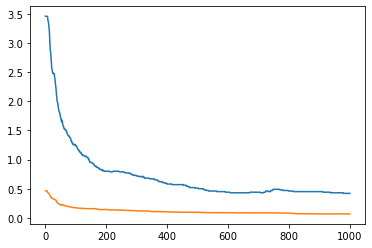

In [6]:
from matplotlib import pyplot as plt
plt.plot(train_loss)
plt.plot(val_loss)

In [7]:
acc=np.sum(np.array(y_pred==_val_y.reshape(-1),dtype=np.uint8))/len(_val_y)
print('accuracy',acc*100,"%")
result_log=pd.DataFrame({})
result_log['true']=_val_y.reshape(-1)
result_log['pred']=y_pred
result_log['right']=np.array((y_pred==_val_y.reshape(-1)),dtype=np.int8)
result_log['wrong']=np.array((y_pred!=_val_y.reshape(-1)),dtype=np.int8)

accuracy 93.26047358834244 %


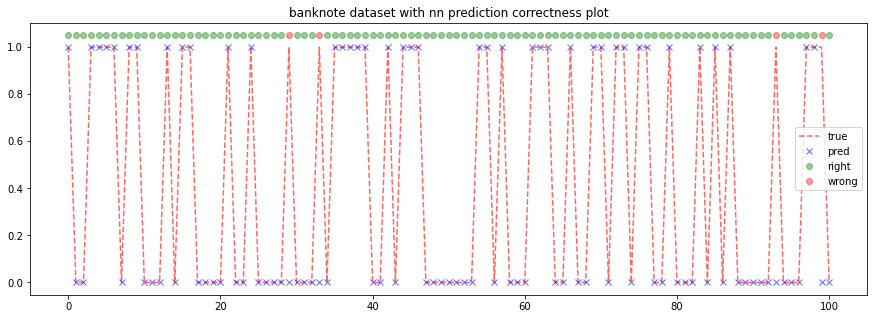

In [8]:
from matplotlib import pyplot as plt
#plt.plot(result_log[['right','wrong']])

fig=plt.figure(figsize=(15,5))
plt.plot(result_log.loc[:100,'true'],'r--',alpha=0.6)
plt.plot(result_log.loc[:100,'pred'],'bx',alpha=0.6)
plt.plot(result_log.loc[:100,'right'][result_log.loc[:100,'right']==1]+0.05,'go',alpha=0.4)
plt.plot(result_log.loc[:100,'right'][result_log.loc[:100,'right']==0]+1.05,'ro',alpha=0.4)
#plt.plot(result_log.loc[:100,'right'],'go',alpha=0.3)
plt.legend(['true','pred','right','wrong'])
plt.title(dataset+' dataset with nn prediction correctness plot')# \n right : 1 \n wrong : 0')
plt.savefig(dataset+'_logr_pred.png')
plt.show()

In [9]:
total=len(result_log)
acc=result_log.right.sum()#,len(result_log)
accuracy=acc/total
labels=result_log['true'].unique()
ldf=pd.DataFrame(data={},index=[' '])
precisions={}
recalls={}
for label in labels:
    true_ind=result_log['true']==label
    false_ind=result_log['true']!=label
    Yes=result_log.loc[true_ind]
    No=result_log.loc[false_ind]
    tp=Yes.right.sum()
    tn=No.right.sum()
    fn=Yes.wrong.sum() #wrong after negative prediction means positive
    fp=No.wrong.sum() #wrong after positive prediction means negative
    recall=tp/(tp+fn)
    precision=tp/(tp+fp)
    precisions[label]=precision
    recalls[label]=recall
    print('----------------------')
    print('label',label)
    print('precision',precision)
    print('recall',recall)
    print('----------------------')
print('Over All Accuracy : ',accuracy)

----------------------
label 1.0
precision 0.950207468879668
recall 0.9015748031496063
----------------------
----------------------
label 0.0
precision 0.9188311688311688
recall 0.9593220338983051
----------------------
Over All Accuracy :  0.9326047358834244


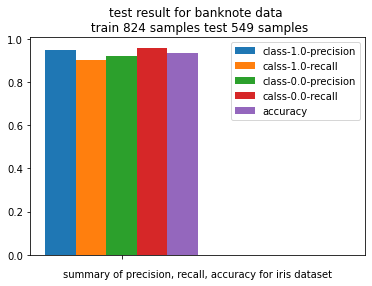

In [10]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

df=pd.DataFrame({},index=[' '])
#fig=plt.figure(figsize=(10,10))
for label in result_log['true'].unique():
    df['class-'+str(label)+'-precision']=[precisions[label],]
    df['calss-'+str(label)+'-recall']=[recalls[label],]
df['accuracy']=accuracy 
df.plot.bar()
plt.xlim(-.3,.8)
plt.title('test result for ' +dataset+ ' data \n '+'train '+str(len(_train_df))+' samples test '+str(len(result_log))+' samples')
plt.xlabel('summary of precision, recall, accuracy for iris dataset')
plt.savefig(dataset+'_logr.png')
plt.show()